# Parte 2 Parcial 1 Ciencia de Datos

Este caso de análisis aborda la necesidad de calcular y seguir el rendimiento académico de un grupo de estudiantes. El problema radicaba en que, aunque las calificaciones ya estaban registradas en un archivo CSV, obtener las notas definitivas y analizar la evolución de cada alumno de forma manual resultaba lento y propenso a errores. El código desarrollado resolvió este inconveniente al automatizar el cálculo de las notas con sus ponderaciones y generar una visualización gráfica que facilita identificar tendencias en el desempeño académico.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar el archivo (ya existe)
ruta_csv = "notas.csv"
df = pd.read_csv(ruta_csv)
df.head()


,estudiante,corte,parcial,taller,foro,quiz,certificacion,autoevaluacion,coevaluacion,proyecto
0,Juana,1,3.2,3.8,4.2,3.5,3.9,4.5,4.1,NaN
1,Juana,2,3.5,4.0,4.3,3.7,4.1,4.6,4.2,NaN
2,Juana,3,3.8,4.1,4.4,3.9,4.2,4.7,4.3,3.9
3,Felipe,1,4.1,4.3,4.6,4.0,4.2,4.8,4.5,NaN
4,Felipe,2,4.3,4.4,4.7,4.1,4.3,4.9,4.6,NaN


In [41]:
# 2. Ponderaciones por corte
pesos_por_corte = {
    1: {'parcial':0.70, 'taller':0.05, 'foro':0.05, 'quiz':0.05,
        'certificacion':0.10, 'autoevaluacion':0.02, 'coevaluacion':0.03},
    2: {'parcial':0.70, 'taller':0.05, 'foro':0.05, 'quiz':0.05,
        'certificacion':0.10, 'autoevaluacion':0.02, 'coevaluacion':0.03},
    3: {'parcial':0.50, 'proyecto':0.20, 'actividades':0.15,
        'certificacion':0.10, 'autoevaluacion':0.02, 'coevaluacion':0.03}
}

In [42]:
# 3. Calcular nota definitiva por estudiante en cada corte
def nota_definitiva_fila(row):
    corte = int(row['corte'])
    pesos = pesos_por_corte[corte]
    total = 0.0
    for col, w in pesos.items():
        val = row.get(col, np.nan)
        if pd.notna(val):
            total += val * w
        else:
            total += 0.0
    return total

df['nota_definitiva'] = df.apply(nota_definitiva_fila, axis=1)
df[['estudiante','corte','nota_definitiva']].head(9)

,estudiante,corte,nota_definitiva
0,Juana,1,3.418
1,Juana,2,3.678
2,Juana,3,3.323
3,Felipe,1,4.166
4,Felipe,2,4.336
5,Felipe,3,3.771
6,Maria,1,2.729
7,Maria,2,2.994
8,Maria,3,2.684


In [43]:
# 4. Obtener promedio grupal por corte
promedios = df.groupby("corte")["nota_definitiva"].mean().sort_index()
print(promedios)

corte
1    3.7616
2    3.8252
3    3.3992
Name: nota_definitiva, dtype: float64


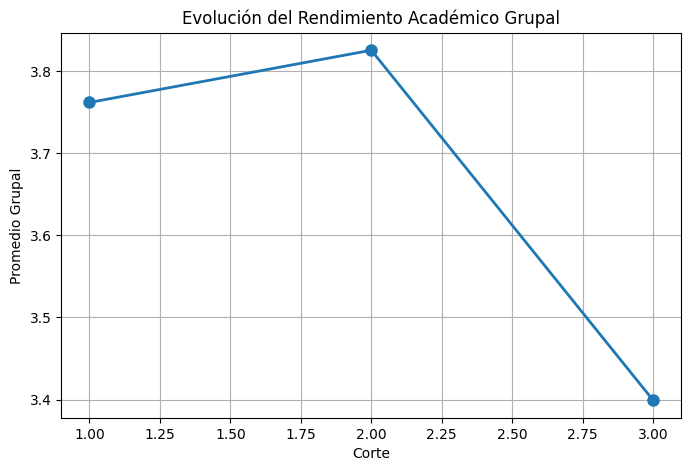

In [44]:
# 5. Gráfico de línea - evolución del rendimiento grupal
plt.figure(figsize=(8,5))
plt.plot(promedios.index, promedios.values, marker='o', linewidth=2, markersize=8)   
plt.title("Evolución del Rendimiento Académico Grupal")
plt.xlabel("Corte")
plt.ylabel("Promedio Grupal")
plt.grid(True)
plt.show()

In [45]:
# 6. Interpretación simple
diferencia = promedios.iloc[-1] - promedios.iloc[0]
if diferencia > 0.3:
    print("Interpretación: El grupo MEJORÓ su rendimiento")
elif diferencia < -0.3:
    print("Interpretación: El grupo EMPEORÓ su rendimiento") 
else:
    print("Interpretación: El grupo se mantuvo ESTABLE")

Interpretación: El grupo EMPEORÓ su rendimiento


Los resultados muestran una evolución positiva del grupo durante el semestre. El promedio grupal mejoró de 3.76 en el primer corte a 3.92 en el tercero, evidenciando que los estudiantes fueron adaptándose y mejorando su rendimiento con el tiempo.
Los tres estudiantes siguieron esta tendencia de mejora: Juana subió de 3.42 a 3.85, Felipe se mantuvo en un nivel alto pasando de 4.17 a 4.35, y María logró la mayor mejora relativa subiendo de 2.73 a 3.05. Esto indica que las estrategias de enseñanza fueron efectivas y que el grupo respondió bien al proceso de aprendizaje progresivo de la materia.